In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Excel file
file_path = 'C:\\Users\\srina\\OneDrive\\Desktop\\vscode\\Gold Prediction\\Daily_Gold_Price_on_World.csv'
df = pd.read_excel(file_path)
df.head(10)

,Date,Gold Price
0,1979-01-01,0.00
1,1979-01-02,1792.85
2,1979-01-03,1802.15
3,1979-01-04,1811.74
4,1979-01-05,1843.57
5,1979-01-08,1841.33
6,1979-01-09,1822.52
7,1979-01-10,1803.50
8,1979-01-11,1814.57
9,1979-01-12,1782.62


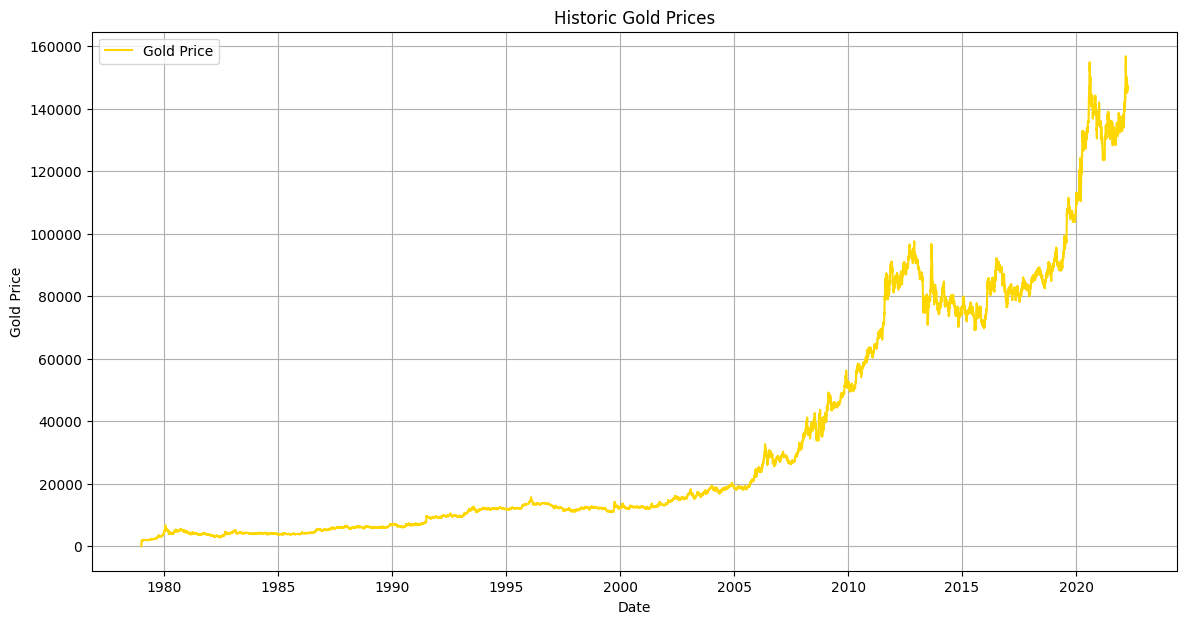


Mean Value:
 34696.30781753764

Median Value:
 13296.82

Standard Deviation:
 38013.5795267853


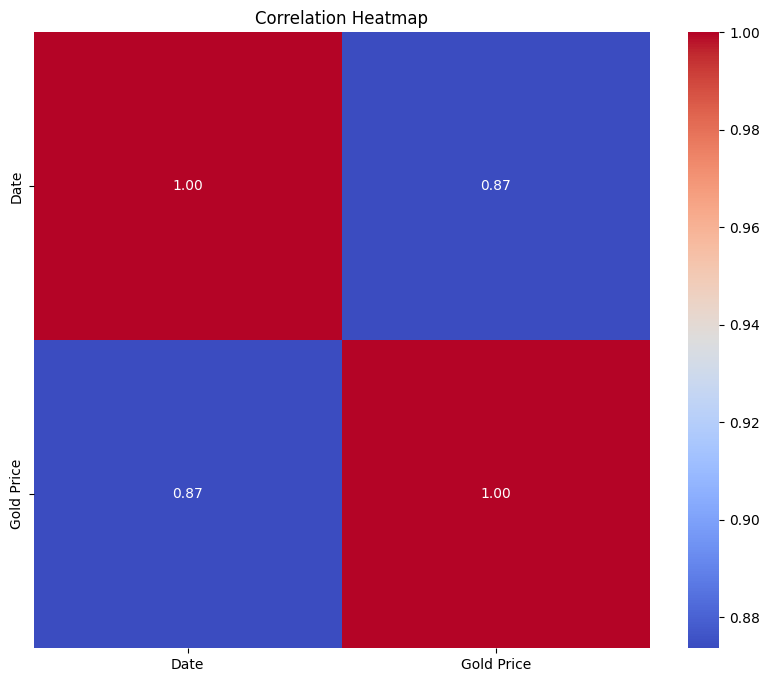

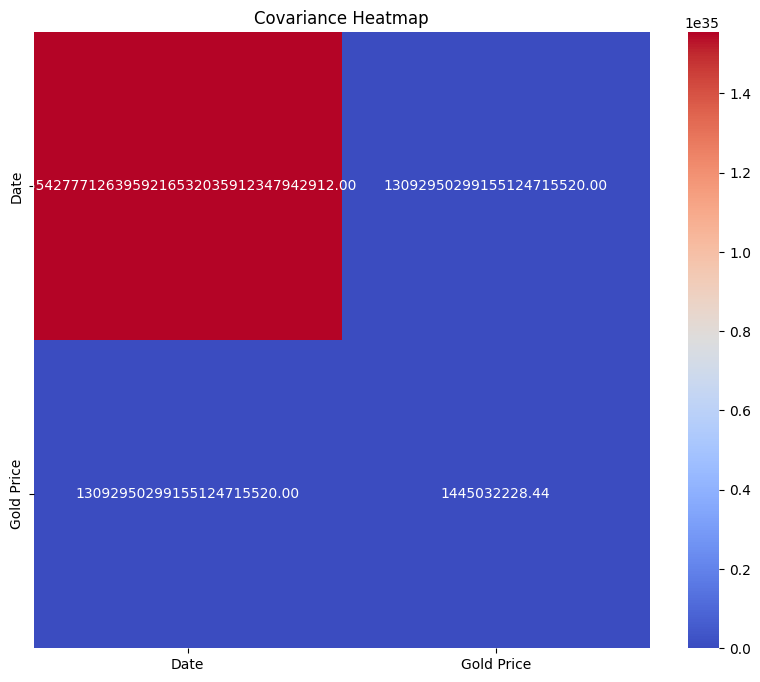

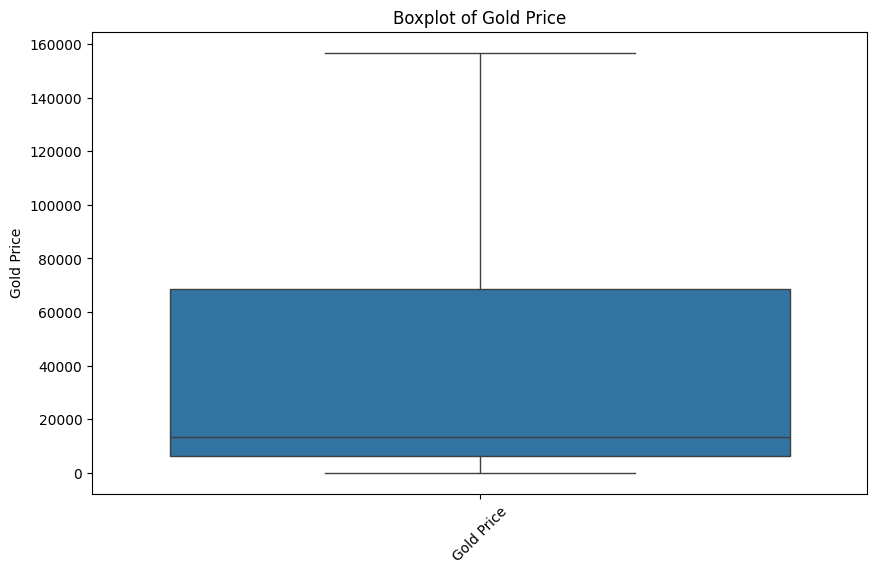


Outliers in Gold Prices:
 Empty DataFrame
Columns: [Date, Gold Price]
Index: []


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date' column exists after checking
if 'Date' in df.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Gold Price'], label='Gold Price', color='gold')
    plt.title('Historic Gold Prices')
    plt.xlabel('Date')
    plt.ylabel('Gold Price')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("The 'Date' column is not found in the DataFrame.")

# Drop unnecessary columns (if needed)
data_cleaned = df.drop(columns=['Index'], errors='ignore')

# Handle missing values by replacing them with the mean
data_cleaned.fillna(data_cleaned.mean(), inplace=True)

# Calculate statistical measures
mean_value = data_cleaned['Gold Price'].mean()
median_value = data_cleaned['Gold Price'].median()
std_dev_value = data_cleaned['Gold Price'].std()

print("\nMean Value:\n", mean_value)
print("\nMedian Value:\n", median_value)
print("\nStandard Deviation:\n", std_dev_value)

# Calculate correlation and covariance (may be trivial with one variable)
correlation_matrix = data_cleaned.corr()
covariance_matrix = data_cleaned.cov()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Plot covariance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Covariance Heatmap')
plt.show()

# Boxplot for gold prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned[['Gold Price']])
plt.title('Boxplot of Gold Price')
plt.ylabel('Gold Price')
plt.xticks(rotation=45)
plt.show()

# Function to identify outliers in Gold Price column
def identify_outliers(df):
    Q1 = df['Gold Price'].quantile(0.25)
    Q3 = df['Gold Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (df['Gold Price'] < lower_bound) | (df['Gold Price'] > upper_bound)
    outliers = df[outlier_mask]
    return outliers

# Identify and print outliers
outliers_data = identify_outliers(data_cleaned)
print("\nOutliers in Gold Prices:\n", outliers_data)


C:\Users\srina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Missing values after handling:
0


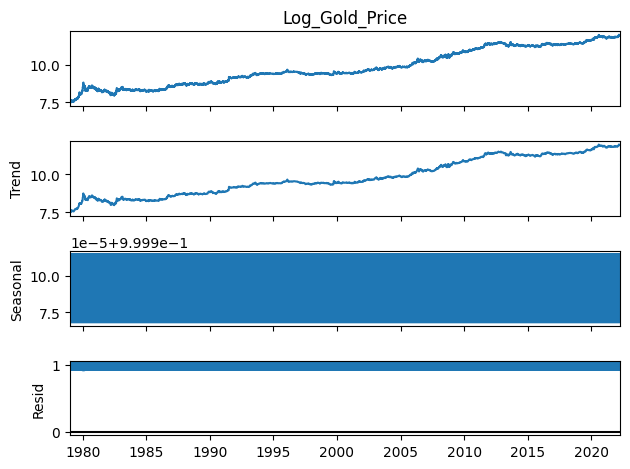

In [6]:
import numpy as np

# Load the Excel file
file_path = 'C:\\Users\\srina\\OneDrive\\Desktop\\vscode\\Gold Prediction\\Daily_Gold_Price_on_World.csv'
df = pd.read_excel(file_path)


# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Log transformation
df['Log_Gold_Price'] = np.log(df['Gold Price'])

# Handle missing values by interpolation
df['Log_Gold_Price'] = df['Log_Gold_Price'].interpolate(method='time')

# Ensure there are no infinite or NaN values
df = df[np.isfinite(df['Log_Gold_Price'])]

# Final check for missing values
print("Missing values after handling:")
print(df['Log_Gold_Price'].isnull().sum())

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['Log_Gold_Price'], model='multiplicative')

# Plot the decomposed components
decomposition.plot()
plt.show()


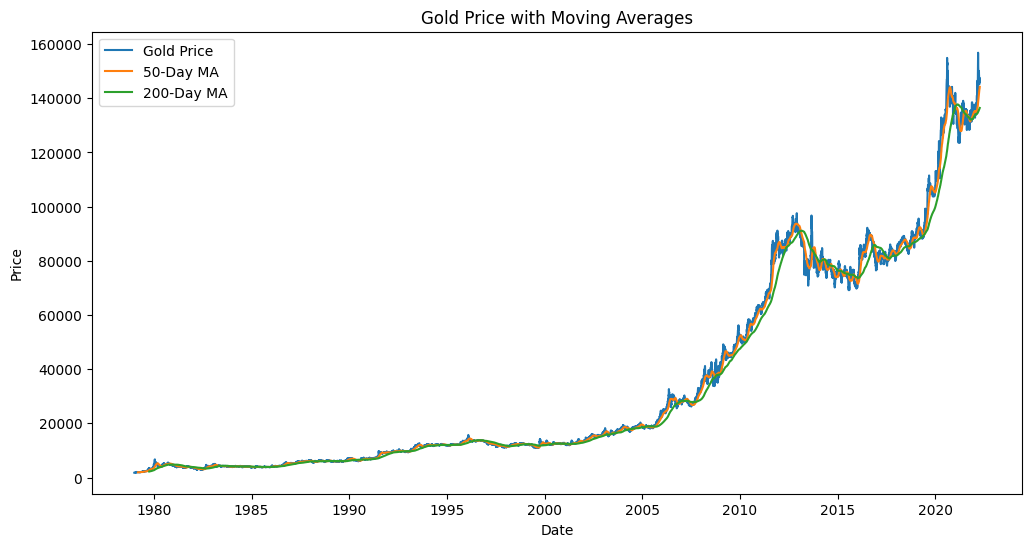

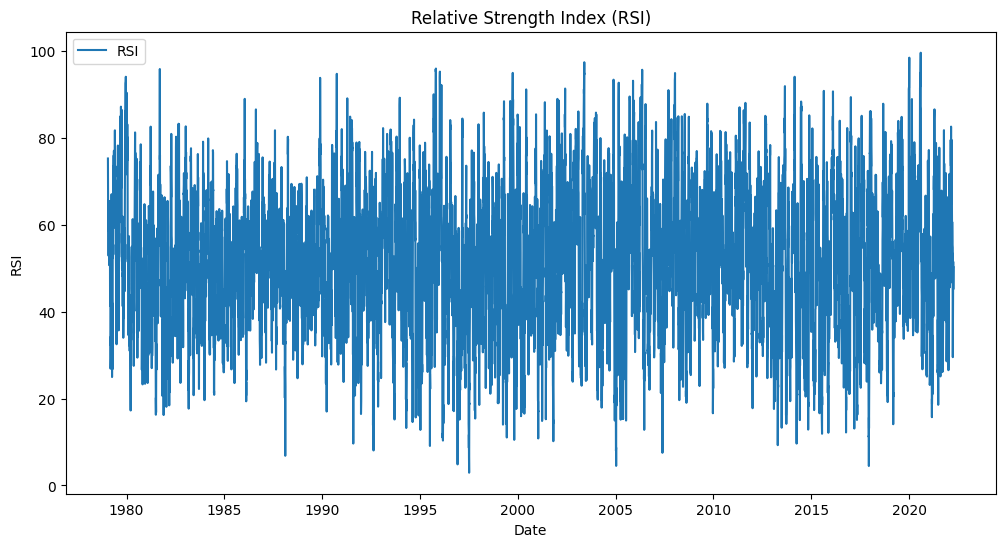

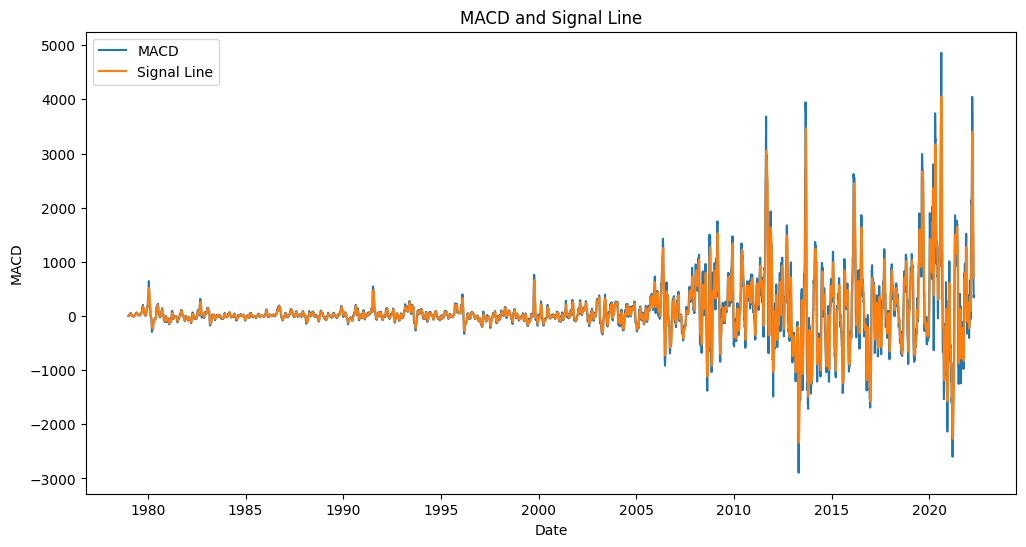

In [7]:
# Moving Average
df['MA50'] = df['Gold Price'].rolling(window=50).mean()
df['MA200'] = df['Gold Price'].rolling(window=200).mean()

# Plot the Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Gold Price'], label='Gold Price')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title('Gold Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Gold Price'], window=14)

# Plot the RSI
plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# MACD
df['EMA12'] = df['Gold Price'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Gold Price'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['Signal'], label='Signal Line')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()
